# LAB-02

# Usama Sadiq z5235652
## Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##reading the file (To be placed in the same directory as the notebook)
filename = "cat.png"

#0 used to read in grey-scale
img = cv.imread(filename, 0)

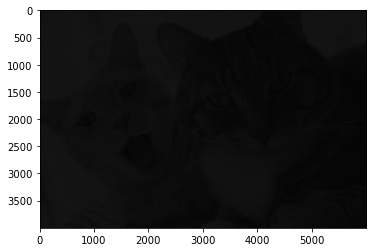

In [3]:
#convert BGR to RGB
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

### Apply contrast stretching

### Step 1
->Find min and max of the image using numpy

### Step 2
->Apply the given formula in the question spec

### Step 3
->Convert it back to 8 bit

In [4]:
#find min and max pixel values in a given image
c = np.amin(img).astype("uint8")
d = np.amax(img).astype("uint8")

c,d

(0, 25)

In [5]:
#apply the give formula in the question spec
modified_image = (( img - c ) * (( 255 - 0 ) // ( d - c ))) + 0 
modified_image = modified_image.astype("uint8")

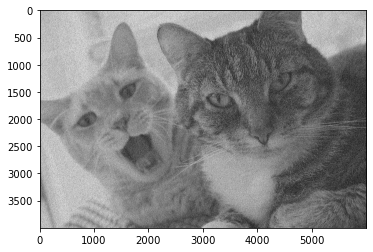

In [6]:
#convert BGR to RGB
rgb_img = cv.cvtColor(modified_image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

## Question-2
### Question-2.1
-> Write a function that computes the histogram of the given grey scale image and displays a plot. Do NOT use built-in OpenCV functions for this purpose.

In [7]:
def display_hist(img):
    plt.hist(img.ravel(),256,[0,256]); plt.show()

### Question-2.2

-> Use this function to now create and plot a histogram for the original image and the contrast stretched image (output of question 1). Match your calculated histogram for the contrast stretched image with the samples provided below. Which is the closest match?

#### Step1
-> Original image and Histrogram of the original image.

#### Step2
-> Contrast Stretched image and Histrogram of the contrast stretched image.


<b>Note<b> Use Tutorial code for subplots using matplotlib.

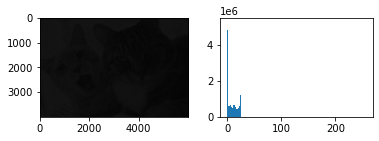

In [8]:
#Original image and Histrogram of the original image.

##Using Tutorial code

plt.subplot(2,2,3),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
#display histogram
plt.subplot(2,2,4),display_hist(img)

plt.show()

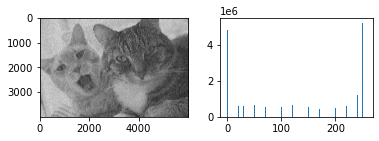

In [9]:
#Contrast Stretched image and Histrogram of the contrast stretched image.

##Using Tutorial code

plt.subplot(2,2,3),plt.imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
#display histogram
plt.subplot(2,2,4),display_hist(modified_image)

plt.show()


<b>Answer: It is closest to the first pic in the spec.</b>

## Question-3:

### <b>Requirments:</b>

-> Implement a 1) mean filter.
               2) median filter.
               3) gaussain filter.
-> Perform noise removal on the output image of Question 1 using these filters.
-> Decide which filter performs best at removing the noise.
-> Try with different filter and kernal sizes.
-> observe the variatians and find the best filter and kernal size for the noisy images.

In [10]:
#Implementing the 2d convolution
########################REFERENCE FROM https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381 ###############


def convolve2D(img, kernel, padding=0, strides=1):
    # Finding the Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Finding the shapes
    KernelShapeX = kernel.shape[0]
    KernelShapeY = kernel.shape[1]
    ImgShapeX = img.shape[0]
    ImgShapeY = img.shape[1]

    # Shape of Output Convolution
    OutputX = int(((ImgShapeX - KernelShapeX + 2 * padding) / strides) + 1)
    OutputY = int(((ImgShapeY - KernelShapeY + 2 * padding) / strides) + 1)
    output = np.zeros((OutputX, OutputY))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imgPadded = np.zeros((img.shape[0] + padding*2, img.shape[1] + padding*2))
        imgPadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img
        print(imgPadded)
    else:
        imgPadded = img

    # Iterate through img
    for y in range(img.shape[1]):
        # Exit Convolution
        if y > img.shape[1] - KernelShapeY:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(img.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > img.shape[0] - KernelShapeX:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imgPadded[x: x + KernelShapeX, y: y + KernelShapeY]).sum()
                except:
                    break

    return output

In [11]:
#Define Mean filter
meanFilter = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

In [12]:
output = convolve2D(modified_image, meanFilter,padding=2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 220. ... 190.   0.   0.]
 ...
 [  0.   0. 230. ...  10.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [13]:
output = output.astype("uint8")

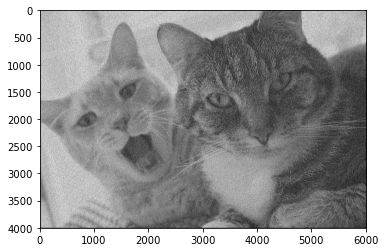

In [14]:
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

In [15]:
#Implementing median filters
###REFERENCE FROM https://en.wikipedia.org/wiki/Median_filter#Two-dimensional_median_filter_pseudo_code################

def medianfilter(img,filter_size=3):
    
    output = np.zeros((img.shape[0],img.shape[1]))
    window = np.zeros(filter_size * filter_size)
    
    edgex = (filter_size // 2)
    edgey = (filter_size // 2)
    
    for x in range(edgex,(img.shape[0] - edgex)):
        for y in range(edgey,(img.shape[1] - edgey)):
            i = 0
            for fx in range(0,filter_size):
                for fy in range(0,filter_size):
                    window[i] = img[x + fx - edgex][y + fy - edgey]
                    
                    i = i + 1
            
            window.sort()
            output[x][y] = window[(filter_size * filter_size) // 2]
    
    return output

In [16]:
output_median = medianfilter(modified_image)

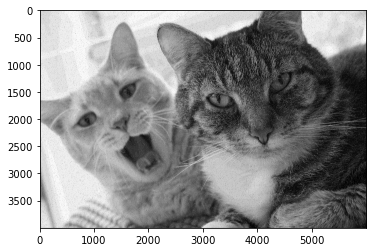

In [17]:
output_median = output_median.astype("uint8")
plt.imshow(cv.cvtColor(output_median, cv.COLOR_BGR2RGB))

In [18]:
#Implementing the gaussian filter
#Generating GassianMatrixx is basis of sigma value
########REFERENCE FROM https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09


def GaussianMatrix(img, sigma):
    
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            
            gaussian_filter[x+m, y+n] = (1/x1)*x2
    return gaussian_filter

In [19]:
GaussianMatrix = GaussianMatrix(modified_image, 0.5)

In [20]:
GaussianMatrix

array([[7.1642120e-08, 2.8902494e-05, 2.1356215e-04, 2.8902494e-05,
        7.1642120e-08],
       [2.8902494e-05, 1.1660098e-02, 8.6157121e-02, 1.1660098e-02,
        2.8902494e-05],
       [2.1356215e-04, 8.6157121e-02, 6.3661975e-01, 8.6157121e-02,
        2.1356215e-04],
       [2.8902494e-05, 1.1660098e-02, 8.6157121e-02, 1.1660098e-02,
        2.8902494e-05],
       [7.1642120e-08, 2.8902494e-05, 2.1356215e-04, 2.8902494e-05,
        7.1642120e-08]], dtype=float32)

In [21]:
output_gauss = convolve2D(modified_image, GaussianMatrix,padding=2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 220. ... 190.   0.   0.]
 ...
 [  0.   0. 230. ...  10.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


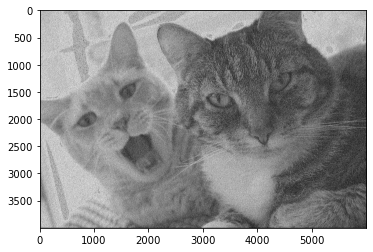

In [22]:
output_gauss = output_gauss.astype("uint8")
plt.imshow(cv.cvtColor(output_gauss, cv.COLOR_BGR2RGB))

### Question 4

-> define the filters fx and fy
-> perform convolution between img and fx
-> perform convolution between img and fy

In [23]:
F_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
F_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

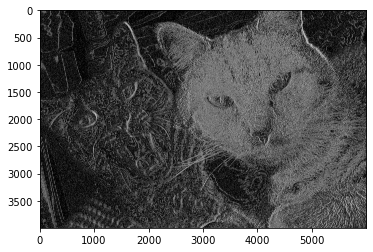

In [24]:
output_F_x = convolve2D(output_median,F_x)
output_F_x = output_F_x.astype("uint8")
plt.imshow(cv.cvtColor(output_F_x, cv.COLOR_BGR2RGB))

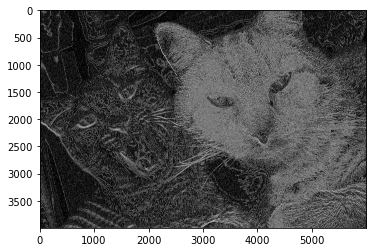

In [25]:
output_F_y = convolve2D(output_median,F_y)
output_F_y = output_F_y.astype("uint8")
plt.imshow(cv.cvtColor(output_F_y, cv.COLOR_BGR2RGB))

### REFERENCES 
1) Implementation of gaussian filter https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09
2) Implementation of convoltution2d  https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
3) Implementation of medianfilters   https://en.wikipedia.org/wiki/Median_filter#Two-dimensional_median_filter_pseudo_code